# Principal Coordinates Analysis (PCoA)

load libraries

In [1]:
import pandas as pd
import numpy as np
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.stats.distance import anosim
import seaborn as sns

In [2]:
md = pd.read_csv('../../metadata.tsv', sep = '\t')

In [4]:
ft = pd.read_csv('../../featuretable_blankfiltered_batchnormalised.tsv', sep = '\t')

In [6]:
ft.index = ft['#OTU ID']

In [7]:
ft = ft.drop(['#OTU ID'], axis=1)

In [9]:
ft = ft.loc[(ft != 0).any(axis=1)]

In [10]:
ft.shape

(9010, 298)

In [11]:
len(ft.T.values)

298

In [12]:
ids = list(ft.columns)

In [13]:
data = ft.T.values

In [14]:
bc_dm = beta_diversity("braycurtis", data, ids)

In [15]:
len(ids)

298

In [16]:
len(data)

298

In [17]:
pcoa_dm = pcoa(bc_dm)

/Users/madeleineernst/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.009395537142393924 and the largest is 5.557996062317063.
  RuntimeWarning


In [18]:
df = pcoa_dm.samples

In [20]:
df['#SampleID'] = df.index

In [21]:
df_md = df.merge(
    md,
    left_on=['#SampleID'],
    right_on=['#SampleID'],
    how='left'
)

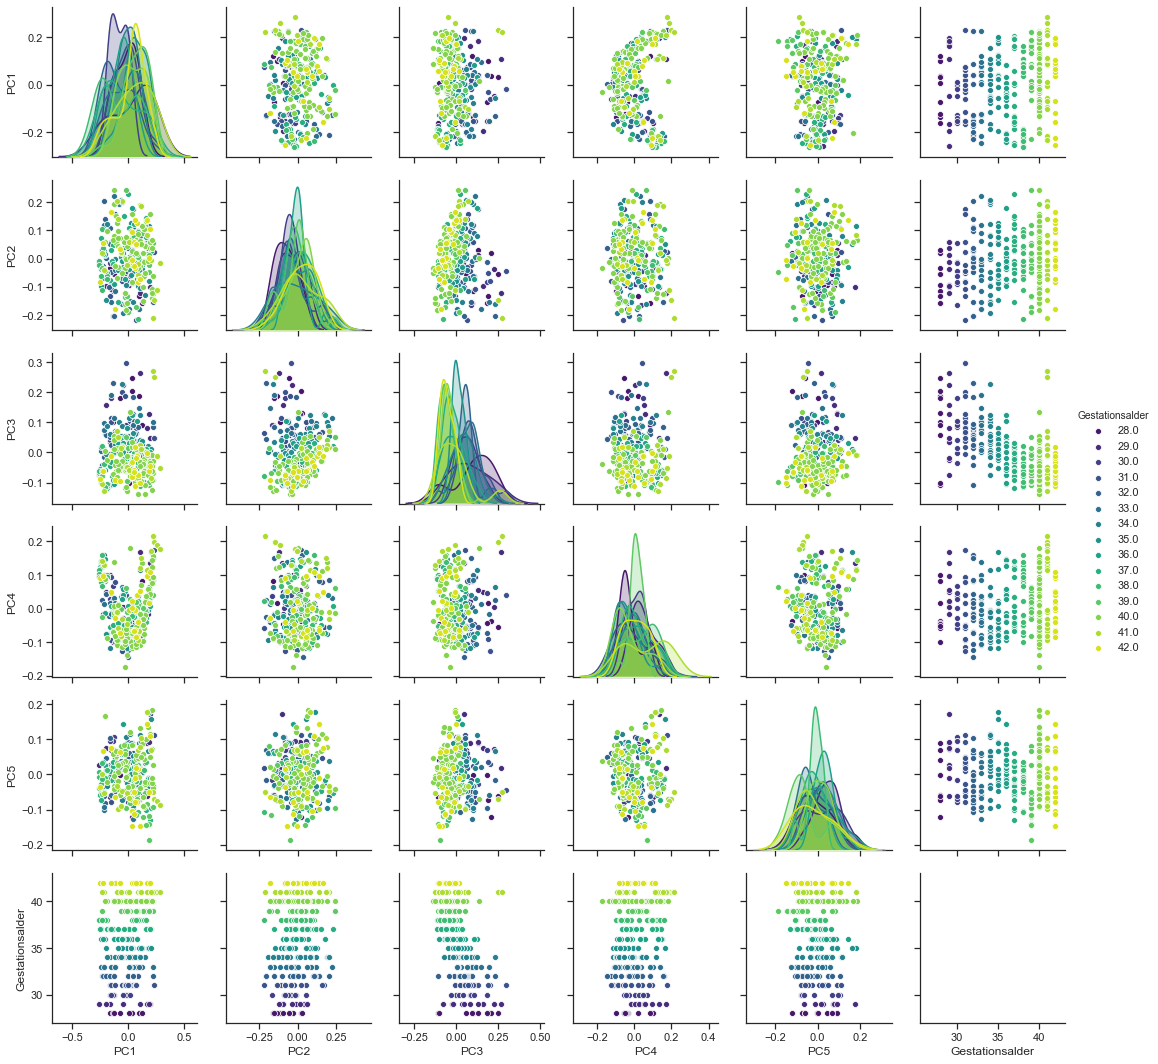

In [23]:
sns.set(style="ticks")
sns.pairplot(df_md[['PC1','PC2','PC3','PC4', 'PC5','Gestationsalder']],hue="Gestationsalder", palette = 'viridis')

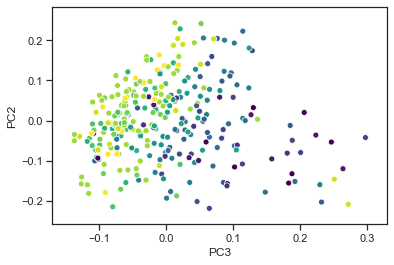

In [27]:
sns_plot = sns.scatterplot(x="PC3", y="PC2", hue="Gestationsalder",data=df_md, palette = 'viridis', legend= False)
fig = sns_plot.get_figure()
fig.savefig("GestationalAge_PC3and2.pdf")

In [28]:
perm = permanova(bc_dm, df_md['Gestationsalder'], column=None, permutations=999)

In [29]:
anos = anosim(bc_dm, df_md['Gestationsalder'], column=None, permutations=999)

In [30]:
perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     298
number of groups                 15
test statistic              2.36008
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [32]:
anos

method name                 ANOSIM
test statistic name              R
sample size                    298
number of groups                15
test statistic            0.210742
p-value                      0.001
number of permutations         999
Name: ANOSIM results, dtype: object